In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Heart Disease data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


    age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
for i in data.columns:
    print('_____________%s_______________' %i)
    print(data[i].value_counts())

_____________age_______________
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
63    32
41    32
67    31
61    31
55    30
65    27
43    26
53    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
74     3
77     3
Name: age, dtype: int64
_____________sex_______________
1    713
0    312
Name: sex, dtype: int64
_____________cp_______________
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
_____________trestbps_______________
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
135     20
124     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
180     10
126     10
142      9
115      9
105      9
146      8
94       7
148      7
178      7
144      6
102      6
200      4


In [9]:
data.shape

(1025, 14)

In [10]:
data[data.duplicated()].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         7
29   1    1   130       204   0    0        202      0      0.0      2      0   2     1         3
45   0    1   130       234   0    0        175      0      0.6      1      0   2     1         3
58   1    2   132       224   0    0        173      0      3.2      2      2   3     0         3
          1   125       220   0    1        144      0      0.4      1      4   3     1         3
                                                                                               ..
57   0    0   140       241   0    1        123      1      0.2      1      0   3     0         2
              128       303   0    0        159      0      0.0      2      1   2     1         2
              120       354   0    1        163      1      0.6      2      0   2     1         2
56   1    3   120       1

In [11]:
df = data.drop_duplicates()

In [12]:
df.shape

(302, 14)

In [13]:
data.shape

(1025, 14)

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<BarContainer object of 2 artists>

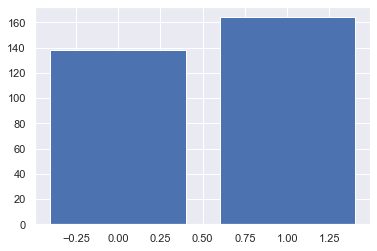

In [45]:
plt.bar(df.target.value_counts().index, df.target.value_counts().values)

Observation:

    More than 50% of People in this dataset is affected by 'heart disease Diagnostic'

In [36]:
df1= df[df['target']==1]

In [48]:
df1.shape

(164, 14)

In [46]:
df2 = df[df['target']==0]

In [49]:
df2.shape

(138, 14)

In [29]:
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

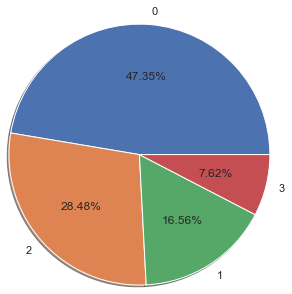

In [43]:
plt.pie(df.cp.value_counts().values, labels = df.cp.value_counts().index, radius=1.5,autopct='%0.2f%%',shadow=True)
plt.show()

Here we can observe that "Peoples who have 0 chest pain are mostly not affected by Heart Disease Diagnostics"

In [65]:
df_cp_0 = df[df['cp']==0]

<BarContainer object of 2 artists>

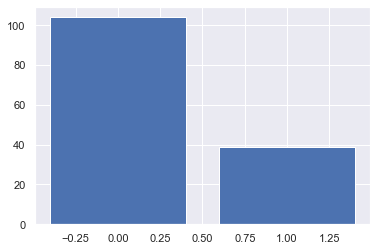

In [66]:
plt.bar(df_cp_0.target.value_counts().index,df_cp_0.target.value_counts().values)

In [50]:
df1.cp.value_counts()

2    68
1    41
0    39
3    16
Name: cp, dtype: int64

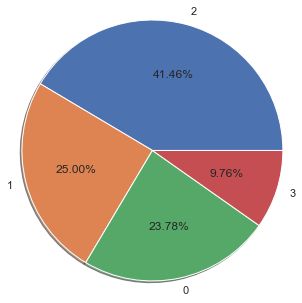

In [42]:
plt.pie(df1.cp.value_counts().values, labels = df1.cp.value_counts().index, radius=1.5,autopct='%0.2f%%',shadow=True)
plt.show()

In [52]:
df1_cp_0= df1[df['cp']==0]

In [53]:
df1_cp_0.shape

(39, 14)

In [64]:
df1_cp_0['age'].max()

71

In [51]:
df2.cp.value_counts()

0    104
2     18
1      9
3      7
Name: cp, dtype: int64

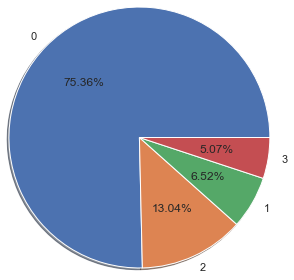

In [47]:
plt.pie(df2.cp.value_counts().values, labels = df2.cp.value_counts().index, radius=1.5,autopct='%0.2f%%',shadow=True)
plt.show()